In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#läser in parquet-filen
wine=pd.read_parquet('wine_parquet')


In [3]:
#ändrar dtypes på kolumner country, province, variety och winery
wine['country']=wine['country'].astype('category')
wine['description']=wine['description'].astype('string')
wine['variety']=wine['variety'].astype('category')
wine['winery']=wine['winery'].astype('category')

In [4]:
#tar bort de kolumner som vi inte är intresserade av i den här analysen
wine=wine.drop(columns=['region_1', 'region_2', 'designation', 'price','province'])
#tar bort de rader som saknar land
wine=wine.dropna(subset=['country'])
#tar bort dubeltter
wine=wine.drop_duplicates(keep='first')
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97842 entries, 0 to 149639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      97842 non-null  category
 1   description  97842 non-null  string  
 2   points       97842 non-null  int64   
 3   variety      97842 non-null  category
 4   winery       97842 non-null  category
dtypes: category(3), int64(1), string(1)
memory usage: 3.3 MB


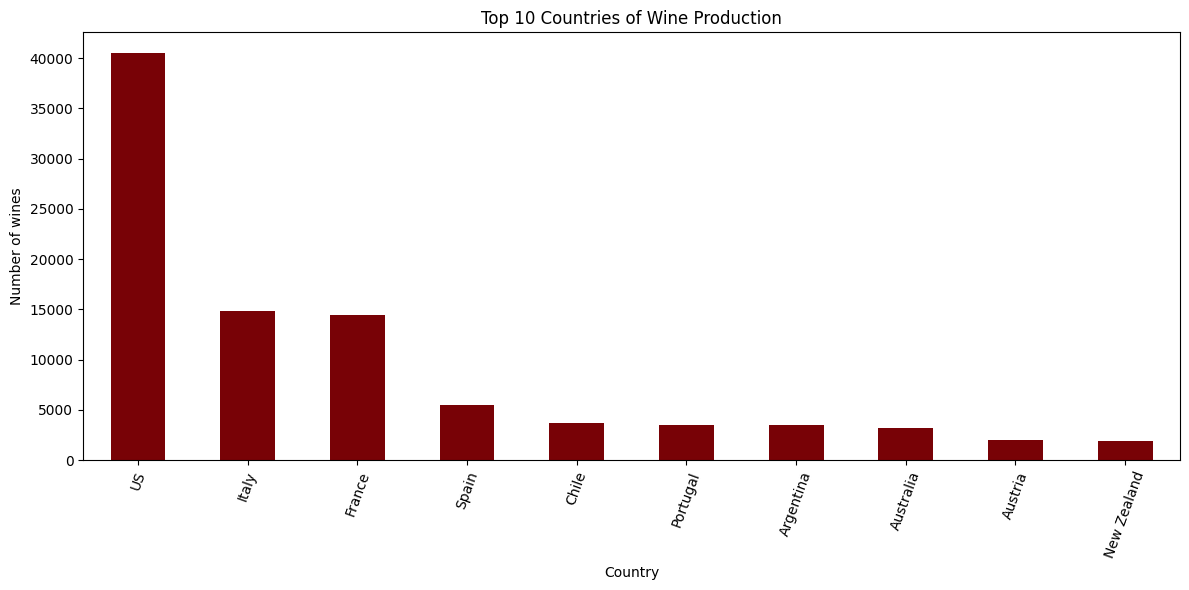

In [5]:
#Diagram 1
#hur många viner görs i de länder med störst produktion?
wine_production_by_country= wine['country'].value_counts()
top_10_countries=wine_production_by_country.head(10)
plt.figure(figsize=(12,6))
top_10_countries.plot(kind='bar', color='#780206')
plt.title('Top 10 Countries of Wine Production')#totalt antal länder i detta dataset är 48
plt.xlabel('Country')
plt.ylabel('Number of wines')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("Number of Wine Production.png", bbox_inches=None)

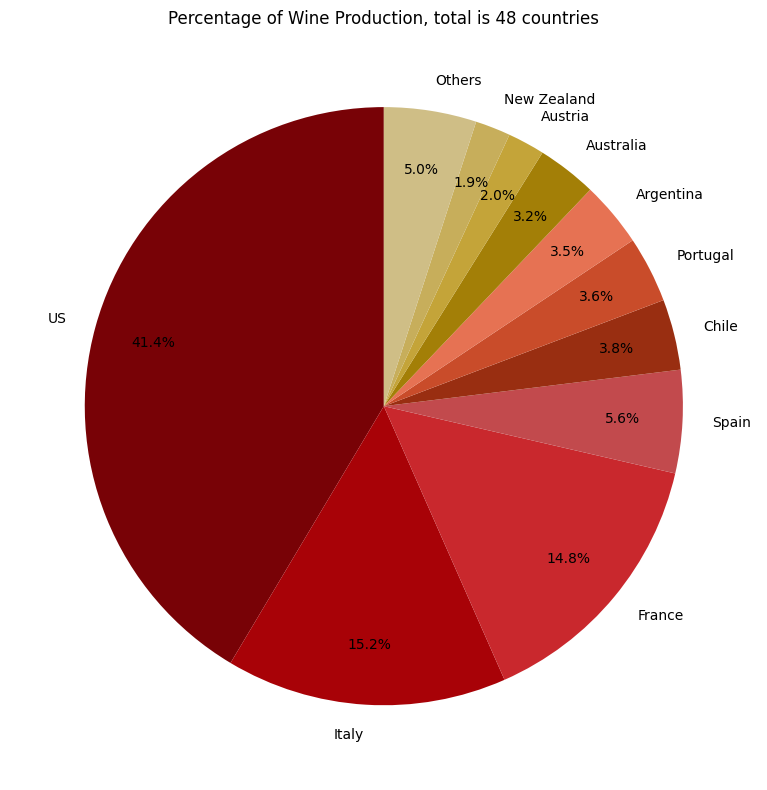

In [6]:
#Diagram 2
#Hur stor del av vinproduktionen står de länder med störst vinproduktion för.
wine_production_by_country= wine['country'].value_counts()
top_10_countries=wine_production_by_country.head(10)
total_wines=wine_production_by_country.sum()
other_countries_count=total_wines-top_10_countries.sum()
all_countries_counts=list(top_10_countries.values)+[other_countries_count]
all_countries_labels=list(top_10_countries.index)+['Others']
colors=['#780206', '#a80207', '#c9282d', '#c24a4d', '#992e11', '#c94c2a', '#e67253', '#a37f07', '#c4a439', '#c7ae5b', '#cfbe86']

plt.figure(figsize=(10,8))
plt.pie(all_countries_counts, labels=all_countries_labels, autopct='%1.1f%%', startangle=90, colors=colors, labeldistance=1.1, pctdistance=0.8)
plt.title('Percentage of Wine Production, total is 48 countries')
plt.tight_layout()
plt.savefig("Percentage of Wine Production.png", bbox_inches=None)

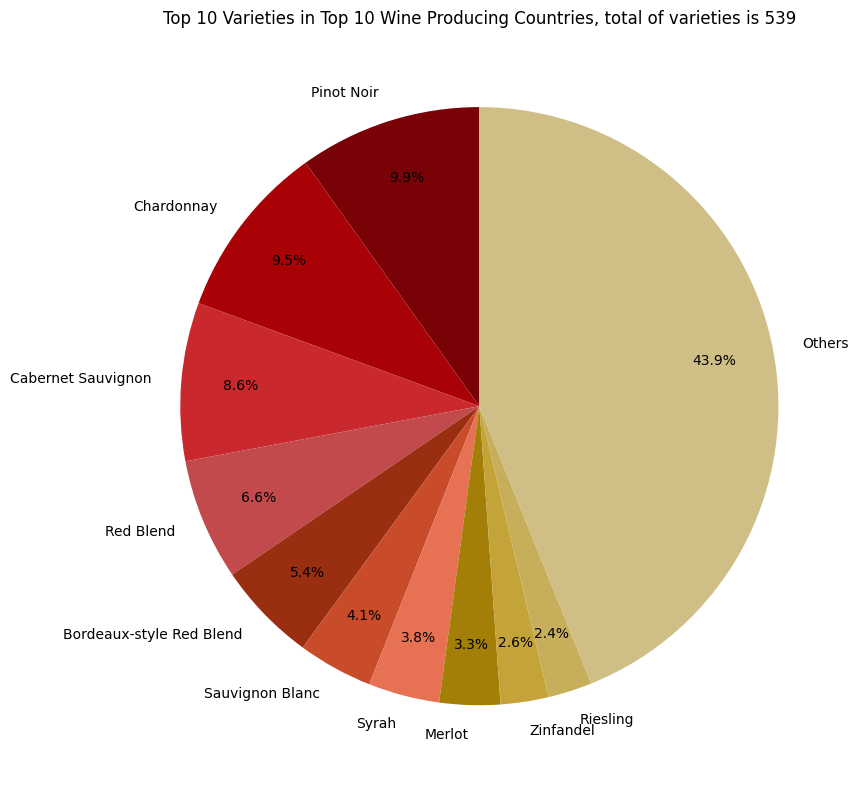

In [7]:
#Diagram 3
# Vilka 10 viner är vanligast i de länder med högst produktion?
top_wine_countries=wine[wine['country'].isin(top_10_countries.index)]
sorts_count=top_wine_countries['variety'].value_counts()
#sorts_count 539 olika sorters viner produceras i de 10 största vinproducent-länderna
top_10_sorts_by_country=sorts_count.head(10)
num_others=sorts_count.sum()-top_10_sorts_by_country.sum()

all_sorts_counts=list(top_10_sorts_by_country.values)+[num_others]
all_sorts_labels=list(top_10_sorts_by_country.index)+['Others']
colors=['#780206', '#a80207', '#c9282d', '#c24a4d', '#992e11', '#c94c2a', '#e67253', '#a37f07', '#c4a439', '#c7ae5b', '#cfbe86']

plt.figure(figsize=(10,8))
plt.pie(all_sorts_counts, labels=all_sorts_labels, autopct='%1.1f%%', startangle=90, colors=colors, labeldistance=1.1, pctdistance=0.8)
plt.title('Top 10 Varieties in Top 10 Wine Producing Countries, total of varieties is 539')
plt.tight_layout()
plt.savefig("Percentage of Most common Wines in Top 10 Countries.png", bbox_inches=None)


In [8]:
#Vilka är de vanligast förekommande vinerna.
most_common=wine['variety'].value_counts()
print(f'Total amount of varieties is {len(most_common)}')
print(most_common.head(10))

Total amount of varieties is 632
variety
Pinot Noir                  9282
Chardonnay                  9162
Cabernet Sauvignon          8271
Red Blend                   6484
Bordeaux-style Red Blend    5175
Sauvignon Blanc             4035
Syrah                       3663
Riesling                    3585
Merlot                      3178
Zinfandel                   2408
Name: count, dtype: int64


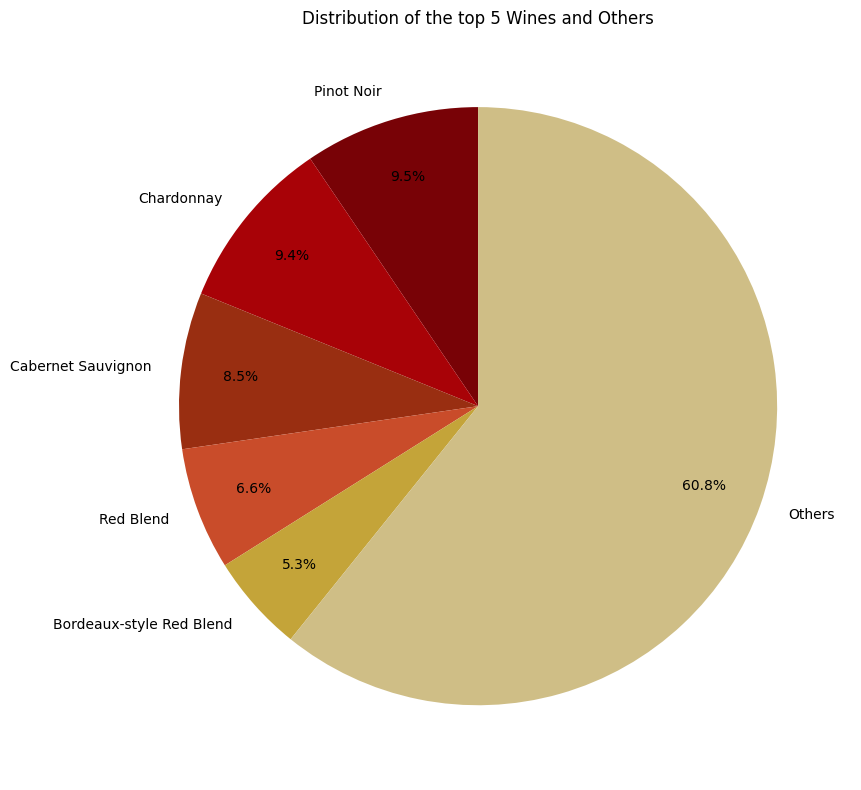

In [9]:
#Diagram 4
#hur stor del av alla viner utgör de 5 vanligaste.
top_5_varietys=most_common.head(5).index
other_count=len(most_common)-5
others_total=most_common.tail(other_count).sum()
top_5_counts=most_common.head(5)
top_5_counts['Others']=others_total
colors=['#780206', '#a80207', '#992e11', '#c94c2a', '#c4a439', '#cfbe86']

total_wines=len(wine)
top_5_percent=top_5_counts/total_wines*100
stacked_df=pd.DataFrame(top_5_percent).transpose()
plt.figure(figsize=(10,8))
plt.pie(stacked_df.iloc[0], labels=stacked_df.columns, autopct='%1.1f%%', startangle=90, colors=colors,pctdistance=0.8)
plt.title('Distribution of the top 5 Wines and Others')
plt.tight_layout()
plt.savefig("Percent of top 5.png", bbox_inches=None)

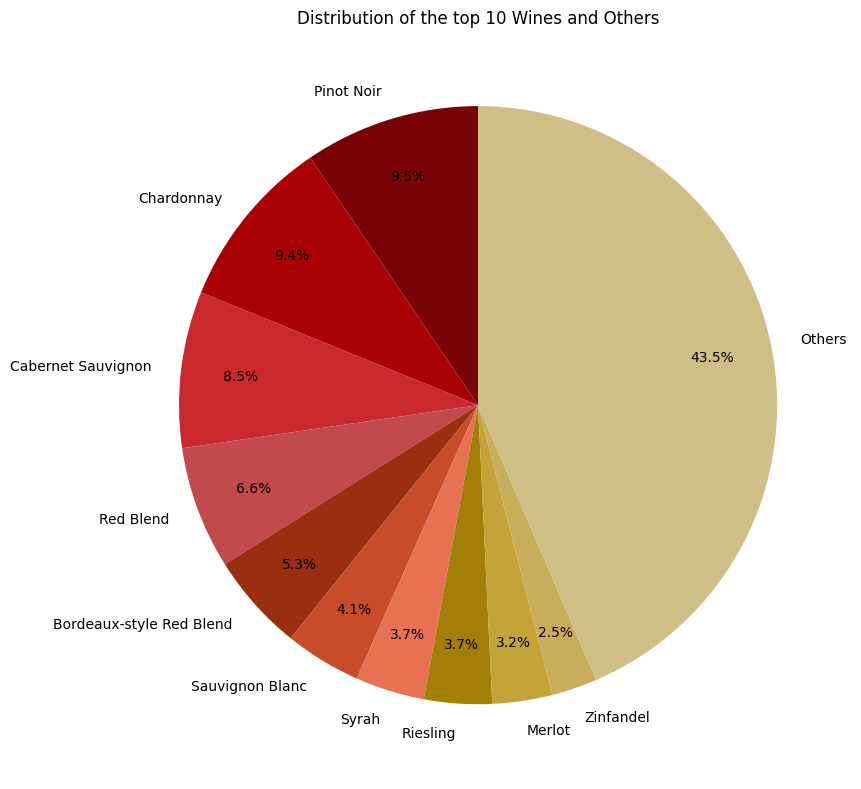

In [10]:
#Diagram 5
#Hur stor del utgör de 10 vanligast förekommande vinerna av alla viner.
top_10_varieties=most_common.head(10).index
other_count_10=len(most_common)-10
others_total_10=most_common.tail(other_count_10).sum()
top_10_counts=most_common.head(10)
top_10_counts['Others']=others_total_10
colors=['#780206', '#a80207', '#c9282d', '#c24a4d', '#992e11', '#c94c2a', '#e67253', '#a37f07', '#c4a439', '#c7ae5b', '#cfbe86']

total_wines=len(wine)
top_10_percent=top_10_counts/total_wines*100
stacked_df=pd.DataFrame(top_10_percent).transpose()
plt.figure(figsize=(10,8))
plt.pie(stacked_df.iloc[0], labels=stacked_df.columns, autopct='%1.1f%%', startangle=90, colors=colors,pctdistance=0.8)
plt.title('Distribution of the top 10 Wines and Others')
plt.tight_layout()
plt.tight_layout()
plt.savefig("Percent of top 10.png", bbox_inches=None)


/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_48896/553716779.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_points_wine_grouped= highest_points_wine.groupby('country')['points'].count()


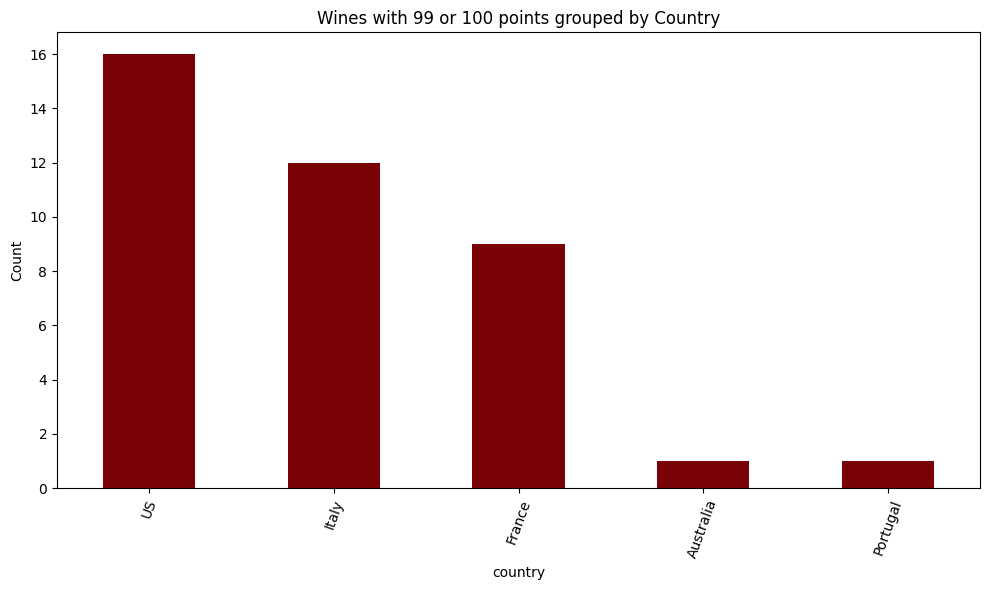

In [11]:
#Diagram 6
#vilka 5 länder har flest viner med 99 eller 100 poäng?
highest_points_wine=wine[wine['points']>=99]
highest_points_wine_grouped= highest_points_wine.groupby('country')['points'].count()
highest_points_wine_grouped_head=highest_points_wine_grouped.sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6))
highest_points_wine_grouped_head.plot(kind='bar', color='#780206')
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Wines with 99 or 100 points grouped by Country')
plt.xticks(rotation=70)
plt.tight_layout()
#plt.savefig("99 or 100 points.png", bbox_inches=None)